In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt

In [4]:
motor_data = pd.read_csv('../data/openaire/Bearing fault diagnosis data10000x1025_1hp.csv')

In [16]:
motor_data.head

<bound method NDFrame.head of       0         1         2         3         4         5         6         7  \
0     0  0.046104 -0.037134 -0.089496 -0.084906 -0.038594  0.025451  0.040680   
1     0  0.076145  0.044435  0.041514  0.051528  0.082820  0.063836  0.044018   
2     0  0.048607  0.012308  0.010431  0.056326  0.100761  0.103473  0.069052   
3     0  0.039428 -0.026286 -0.048607 -0.016063  0.031918  0.076770  0.063836   
4     0  0.014812 -0.000834  0.007510  0.038385  0.042349  0.017524 -0.027537   
...  ..       ...       ...       ...       ...       ...       ...       ...   
9995  9  0.146598 -0.086903 -0.147410  0.142131 -0.018274 -0.288322 -0.024365   
9996  9 -0.119390  0.242028  0.001218 -0.278576  0.030050  0.514107  0.485275   
9997  9  0.121014  0.004467  0.021929  0.071471 -0.066192  0.051167  0.203044   
9998  9 -0.120608 -0.086497  0.066598  0.027614 -0.172181 -0.102740  0.050761   
9999  9  0.140912  0.158780 -0.026802 -0.025177  0.281825  0.196953 -0.077157  

In [27]:
motor_data['0']

0       0
1       0
2       0
3       0
4       0
       ..
9995    9
9996    9
9997    9
9998    9
9999    9
Name: 0, Length: 10000, dtype: int64

In [5]:
normal = motor_data[motor_data['0'] == 0]
sc2t = motor_data[motor_data['0'] == 1]
sc4t = motor_data[motor_data['0'] == 2]
sc8t = motor_data[motor_data['0'] == 3]
ae = motor_data[motor_data['0'] == 4]
rbb = motor_data[motor_data['0'] == 5]
baf = motor_data[motor_data['0'] == 6]

In [13]:
ae

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
4000,4,0.005523,-0.103796,-0.045482,0.125237,0.061888,-0.095999,0.050680,0.155613,-0.008284,...,0.080405,0.136608,0.139857,0.081705,0.024690,0.094050,0.148303,0.067898,-0.029888,-0.011858
4001,4,-0.041096,-0.065299,-0.058964,0.015594,-0.003736,-0.075207,-0.009909,0.017543,-0.058314,...,-0.265257,-0.038497,0.071147,-0.097624,-0.132547,0.042233,0.118415,-0.031025,0.002761,0.195085
4002,4,-0.117441,0.063350,0.009909,-0.103958,-0.015594,0.126699,0.107532,0.009421,0.078781,...,-0.153176,-0.034436,0.054091,-0.057664,-0.144405,-0.026802,0.083654,-0.061563,-0.109969,0.079431
4003,4,0.228546,-0.485031,-0.250962,0.450433,-0.038984,-0.578594,0.169420,0.454169,-0.363043,...,0.098598,0.077644,0.041096,0.079106,0.052467,0.016731,0.040446,0.051817,0.042396,0.075857
4004,4,-0.129623,-0.011858,0.195897,0.029076,-0.146029,0.008284,0.179166,0.025665,-0.119877,...,-0.114679,0.172019,-0.038172,-0.214902,-0.055553,0.016081,-0.119552,-0.124913,-0.003086,-0.042396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,-0.147816,-0.050030,0.032974,-0.073421,-0.114517,0.023228,0.066761,-0.027127,-0.064487,...,0.032974,-0.042396,0.029726,0.019330,-0.076994,-0.060426,0.062700,0.073746,0.004386,0.024853
4996,4,0.085278,0.325358,0.202394,-0.466189,-0.087877,0.808277,0.058802,-0.785374,-0.021929,...,-0.036223,-0.098436,0.019005,0.019005,-0.081055,-0.053116,0.013482,-0.079918,-0.173481,-0.063350
4997,4,0.050192,-0.012832,-0.036061,0.057177,0.099410,-0.036061,-0.062050,0.113542,0.096811,...,0.089339,0.164709,0.050517,-0.155775,0.056852,0.369540,0.101035,-0.280525,-0.010071,0.345662
4998,4,0.058964,0.030863,0.031350,0.080081,0.101360,-0.057989,-0.087715,0.115979,0.094375,...,0.169257,0.034924,-0.034761,0.081867,0.073096,-0.085441,-0.082679,-0.009259,-0.052954,-0.051330


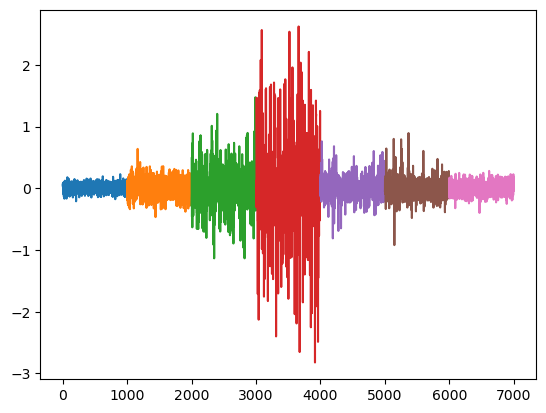

In [37]:
plt.plot(normal['1'])
plt.plot(sc2t['1'])
plt.plot(sc4t['1'])
plt.plot(sc8t['1'])
plt.plot(ae['1'])
plt.plot(rbb['1'])
plt.plot(baf['1'])